In [10]:
import pandas as pd
import yfinance as yf
from pathlib import Path
%matplotlib inline

In [11]:
# This .csv is transposed for ease of use in calculating averages/means further along in the code, hence the lack of column headers.

mortgage_delin_all_df = pd.read_csv(Path("./mort_data_for_analysis_plot.csv"), header=None, index_col=0)
mortgage_delin_all_df.index.name = "Date"

mortgage_delin_all_df

,1,2,3,4,5,6,7,8,9,10,...,261,262,263,264,265,266,267,268,269,270
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,4.7,3.6,3.9,4.3,5.3,3.4,3.5,1.9,4.0,3.9,...,4.1,4.0,4.3,5.3,4.4,2.6,3.7,5.2,6.1,6.0
2008-03-01,4.3,3.3,3.8,4.2,4.9,3.4,3.9,1.8,3.3,3.6,...,3.5,3.6,3.5,5.1,4.4,3.2,4.0,5.1,5.6,5.4
2008-04-01,4.5,3.5,3.7,3.9,5.6,3.3,3.8,2.3,3.6,3.7,...,3.8,3.5,3.6,4.9,4.4,3.1,3.9,5.3,5.4,5.0
2008-05-01,4.6,3.6,3.9,4.3,5.8,3.4,3.5,1.7,3.6,3.9,...,3.8,3.9,4.0,5.4,4.6,3.3,4.2,5.8,5.5,5.3
2008-06-01,4.9,3.8,4.2,4.2,5.2,3.7,3.7,2.1,3.6,4.0,...,4.1,3.8,3.7,5.2,4.6,3.8,4.2,5.5,6.1,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,1.8,1.7,1.5,1.9,2.1,1.4,0.9,0.4,1.3,1.0,...,1.0,1.6,1.7,2.1,1.4,0.7,1.6,2.4,1.3,2.3
2020-12-01,2.0,2.1,1.8,2.0,2.2,1.4,0.9,0.7,1.6,1.4,...,1.5,1.9,1.5,2.4,1.7,0.9,1.9,2.5,1.4,2.9
2021-01-01,1.9,2.0,1.6,2.0,1.8,1.4,0.8,0.9,1.5,1.2,...,1.8,1.6,1.8,2.3,1.9,0.9,1.9,2.6,1.6,2.5


In [12]:
# Removes the 1st row ("Adj Close" repeated), 3rd row ("Date" and blanks/NaN), and creates a new "Date" header in line with the 
# tickers, now at the top of each column.

bank_stocks_df = (pd.read_csv(Path("./stock_data_for_analysis_plot.csv"),  skiprows=1, index_col='Unnamed: 0')).iloc[1:]
bank_stocks_df.index.name = "Date"

display(bank_stocks_df)

# Use this line as needed to test that the first 3 rows in the .csv are formatted correctly. 
# Viewing the DataFrame in Excel may be clearer than within this notebook.

###bank_stocks_df.to_csv("test_stockdata_import.csv")

,BAC,BNY,C,COF,FITB,GS,JPM,KEY,MS,PNC,STT,TD,USB,WFC
Date,,,,,,,,,,,,,,
2008-02-01,31.548317,7.070978,196.573074,36.530891,15.906178,139.744537,28.768993,15.291545,32.833176,43.543236,60.794300,19.602030,22.356318,20.080313
2008-03-01,30.095537,7.302771,177.587296,39.360386,14.530881,136.251495,30.396744,15.468933,35.623863,46.477776,61.142570,17.940987,22.593708,20.196489
2008-04-01,30.301884,7.533551,209.506576,42.383194,15.183636,157.654327,33.723057,17.005255,37.884434,49.157158,55.993351,19.221865,23.962364,20.647608
2008-05-01,27.452501,7.202706,181.483978,38.480747,13.249374,145.599960,30.680206,13.721187,34.674561,46.001305,55.900196,21.334978,23.467415,19.134617
2008-06-01,19.267612,7.193567,140.734665,30.607710,7.212760,144.353668,24.479940,7.868788,28.277435,40.882103,49.667515,18.390490,19.719982,16.648439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,27.589148,13.511387,53.825478,84.397263,24.562843,226.562942,114.992279,14.891003,60.807156,134.465530,68.657158,51.698044,41.861828,26.962687
2020-12-01,29.695562,13.939845,60.266556,97.539505,26.724453,259.115784,123.957153,15.987152,67.396317,145.110168,70.897659,54.286316,45.136372,29.889214
2021-01-01,29.229996,14.427583,56.679493,102.877785,28.323067,267.898102,125.517960,16.425558,65.940811,139.773224,68.682724,54.449890,41.894501,29.592102


,BAC,BNY,C,COF,FITB,GS,JPM,KEY,MS,PNC,STT,TD,USB,WFC
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,17.310747,10.149518,52.038787,60.343123,16.083535,158.671889,58.189748,10.624550,30.527153,76.533271,53.856709,34.070756,32.288309,33.661387
std,7.946915,2.155654,32.128282,23.048913,7.109575,48.240217,31.919254,4.349859,12.975160,35.637920,17.449838,11.891226,11.612827,11.953293
min,3.391417,4.659147,13.005264,9.881766,1.532831,65.520485,16.815765,3.698685,11.142421,20.279646,18.322454,8.956659,10.574128,8.658218
25%,11.835034,8.402579,36.219650,40.805621,10.145089,128.762588,31.148177,6.473419,21.636801,45.990270,36.445998,25.736704,21.646608,21.664089
50%,14.552197,10.385368,44.894180,63.072336,15.769818,148.814056,48.378958,10.562381,27.578057,69.762245,55.878420,32.907301,34.124588,33.849617
75%,25.084213,11.973058,59.152562,77.091391,22.272468,194.212448,89.222357,14.983047,39.402461,107.654522,65.074835,42.660642,43.678426,44.709893
max,38.141941,14.953994,209.506576,125.971199,36.664322,323.054474,149.570267,19.621040,76.767990,172.055878,99.085068,63.416378,55.749092,58.501762


<AxesSubplot:title={'center':"Banks' Stock Price Movements, 01/08 - 09/21"}, xlabel='Date'>

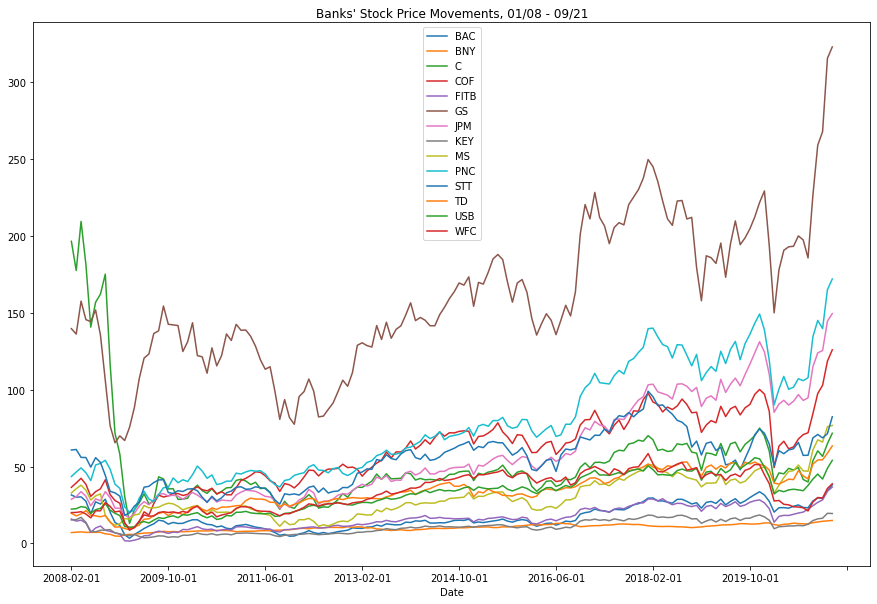

In [13]:
# Check bank stocks' summary statistics and line plots to verify that movement over time (not price) is comparable.

display(bank_stocks_df.describe())

display(bank_stocks_df.plot.line(title="Banks' Stock Price Movements, 01/08 - 09/21", figsize = (15, 10)))

In [14]:
# Averages all banks' stock prices for each month. The shape of the line graph above indicates that all stocks move
# in a similar manner, justifying the use of monthly averages for the purpose of this analysis.

bank_stocks_df['mean'] = bank_stocks_df.iloc[:, 0:14].mean(axis=1)

bank_stocks_df

,BAC,BNY,C,COF,FITB,GS,JPM,KEY,MS,PNC,STT,TD,USB,WFC,mean
Date,,,,,,,,,,,,,,,
2008-02-01,31.548317,7.070978,196.573074,36.530891,15.906178,139.744537,28.768993,15.291545,32.833176,43.543236,60.794300,19.602030,22.356318,20.080313,47.903135
2008-03-01,30.095537,7.302771,177.587296,39.360386,14.530881,136.251495,30.396744,15.468933,35.623863,46.477776,61.142570,17.940987,22.593708,20.196489,46.783531
2008-04-01,30.301884,7.533551,209.506576,42.383194,15.183636,157.654327,33.723057,17.005255,37.884434,49.157158,55.993351,19.221865,23.962364,20.647608,51.439876
2008-05-01,27.452501,7.202706,181.483978,38.480747,13.249374,145.599960,30.680206,13.721187,34.674561,46.001305,55.900196,21.334978,23.467415,19.134617,47.027409
2008-06-01,19.267612,7.193567,140.734665,30.607710,7.212760,144.353668,24.479940,7.868788,28.277435,40.882103,49.667515,18.390490,19.719982,16.648439,39.664620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,27.589148,13.511387,53.825478,84.397263,24.562843,226.562942,114.992279,14.891003,60.807156,134.465530,68.657158,51.698044,41.861828,26.962687,67.484625
2020-12-01,29.695562,13.939845,60.266556,97.539505,26.724453,259.115784,123.957153,15.987152,67.396317,145.110168,70.897659,54.286316,45.136372,29.889214,74.281575
2021-01-01,29.229996,14.427583,56.679493,102.877785,28.323067,267.898102,125.517960,16.425558,65.940811,139.773224,68.682724,54.449890,41.894501,29.592102,74.408057


Date
2008-02-01    47.903135
2008-03-01    46.783531
2008-04-01    51.439876
2008-05-01    47.027409
2008-06-01    39.664620
                ...    
2020-11-01    67.484625
2020-12-01    74.281575
2021-01-01    74.408057
2021-02-01    85.871659
2021-03-01    90.506815
Name: mean, Length: 158, dtype: float64

<AxesSubplot:title={'center':"Average of 14 Banks' Stock Prices (Movement), 02/08 - 03/21"}, xlabel='Date'>

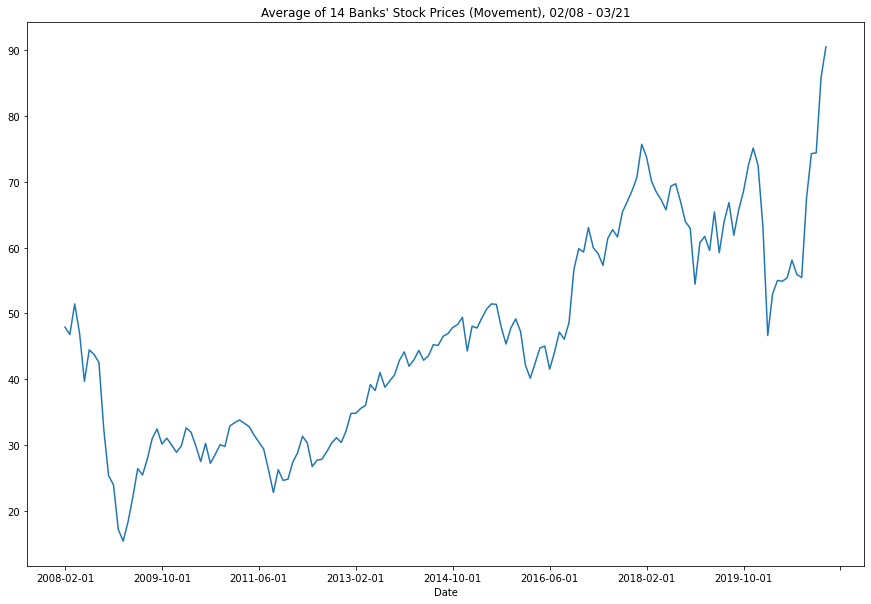

In [15]:
# Use the stocks' combined average to create the first plot for the eventual overlay plot (ax=ax) later in the code.

bank_stocks_df_mean = bank_stocks_df.loc[:, "mean"]
display(bank_stocks_df_mean)

bank_stocks_df_mean.plot(title="Average of 14 Banks' Stock Prices (Movement), 02/08 - 03/21", figsize=(15,10))

In [16]:
# Specify the mean of mortgage delinquencies for use in the overlay plot. Review to ensure the mean column 
# has been added to the DataFrame.

mortgage_delin_all_df['mean'] = mortgage_delin_all_df.iloc[:, 0:270].mean(axis=1)

mortgage_delin_all_df

,1,2,3,4,5,6,7,8,9,10,...,262,263,264,265,266,267,268,269,270,mean
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,4.7,3.6,3.9,4.3,5.3,3.4,3.5,1.9,4.0,3.9,...,4.0,4.3,5.3,4.4,2.6,3.7,5.2,6.1,6.0,4.573704
2008-03-01,4.3,3.3,3.8,4.2,4.9,3.4,3.9,1.8,3.3,3.6,...,3.6,3.5,5.1,4.4,3.2,4.0,5.1,5.6,5.4,4.371852
2008-04-01,4.5,3.5,3.7,3.9,5.6,3.3,3.8,2.3,3.6,3.7,...,3.5,3.6,4.9,4.4,3.1,3.9,5.3,5.4,5.0,4.362963
2008-05-01,4.6,3.6,3.9,4.3,5.8,3.4,3.5,1.7,3.6,3.9,...,3.9,4.0,5.4,4.6,3.3,4.2,5.8,5.5,5.3,4.598889
2008-06-01,4.9,3.8,4.2,4.2,5.2,3.7,3.7,2.1,3.6,4.0,...,3.8,3.7,5.2,4.6,3.8,4.2,5.5,6.1,5.4,4.607037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,1.8,1.7,1.5,1.9,2.1,1.4,0.9,0.4,1.3,1.0,...,1.6,1.7,2.1,1.4,0.7,1.6,2.4,1.3,2.3,1.433333
2020-12-01,2.0,2.1,1.8,2.0,2.2,1.4,0.9,0.7,1.6,1.4,...,1.9,1.5,2.4,1.7,0.9,1.9,2.5,1.4,2.9,1.630370
2021-01-01,1.9,2.0,1.6,2.0,1.8,1.4,0.8,0.9,1.5,1.2,...,1.6,1.8,2.3,1.9,0.9,1.9,2.6,1.6,2.5,1.580370


In [17]:
# Averages delinquent mortgages across all US metro areas for each month.
# Merge these averages and the bank stock averages into a new DataFrame for the upcoming overlay plot. This also ensures 
# that the dates (index) match exactly for both data sets.

mort_delin_all_metros_avgs = mortgage_delin_all_df.loc[:, "mean"]

combined_avgs = mort_delin_all_metros_avgs.to_frame().merge(right=bank_stocks_df_mean.to_frame(),left_index=True, right_index=True)
combined_avgs.columns = ["Avg - All Metro Areas", "Avg - All Banks' Stock Prices"]
display(combined_avgs)

,Avg - All Metro Areas,Avg - All Banks' Stock Prices
Date,,
2008-02-01,4.573704,47.903135
2008-03-01,4.371852,46.783531
2008-04-01,4.362963,51.439876
2008-05-01,4.598889,47.027409
2008-06-01,4.607037,39.664620
...,...,...
2020-11-01,1.433333,67.484625
2020-12-01,1.630370,74.281575
2021-01-01,1.580370,74.408057


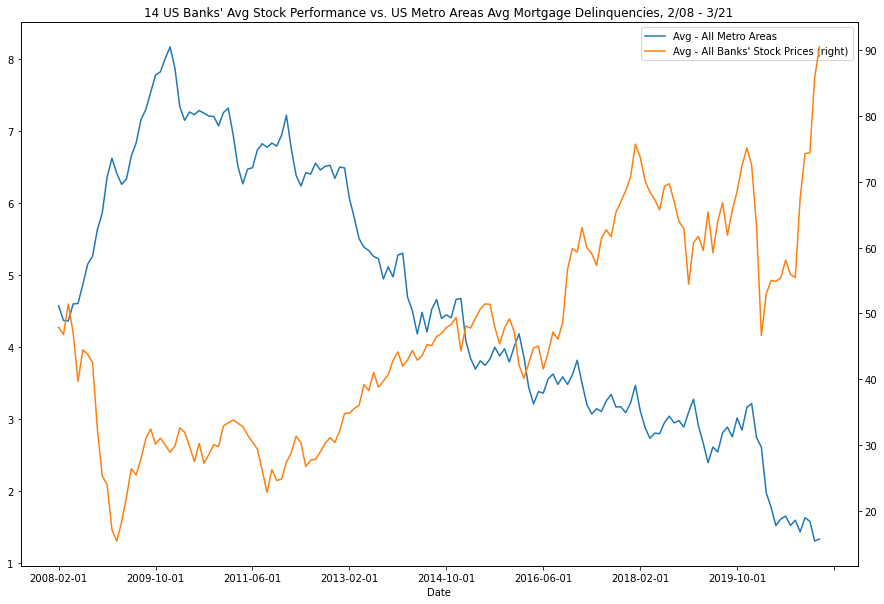

In [18]:
# Create the final overlay plot with a double y-axis: left = mortgage delinquencies, right = average stock price.

ax = combined_avgs["Avg - All Metro Areas"].plot(legend=True)
ax.set_ylim = (0, 20)
ax2 = combined_avgs["Avg - All Banks' Stock Prices"].plot(
    title="14 US Banks' Avg Stock Performance vs. US Metro Areas Avg Mortgage Delinquencies, 2/08 - 3/21",
    secondary_y=True,
    figsize=(15,10),
    legend=True
)